# Base risco de crédito 

In [6]:
from sklearn.linear_model import LogisticRegression

In [1]:
import pickle

with open('../data-pickles/risco_credito.pkl', 'rb') as file:
    X_risco_credito, y_risco_credito = pickle.load(file)
    
X_risco_credito.shape, y_risco_credito.shape

((14, 4), (14,))

In [3]:
y_risco_credito # 2, 7, 11

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [4]:
# para esse algoritmo queremos ter apenas como output ou alto ou baixo
# por isso, iremos apagar os registros que são moderados
import numpy as np

X_risco_credito = np.delete(X_risco_credito, [2, 7, 11], axis=0)
y_risco_credito = np.delete(y_risco_credito, [2, 7, 11], axis=0)

In [5]:
X_risco_credito.shape, y_risco_credito.shape

((11, 4), (11,))

In [7]:
logistic_risco_credit = LogisticRegression(random_state=0)
logistic_risco_credit.fit(X_risco_credito, y_risco_credito)

LogisticRegression(random_state=0)

In [8]:
logistic_risco_credit.coef_

array([[-0.76704533,  0.23906678, -0.47976059,  1.12186218]])

In [12]:
logistic_risco_credit.intercept_

array([-0.80828993])

In [9]:
# historia boa (0), divida alta (0), garantias nenhuma (1), renda >35 (2)
# historia ruim (2), divida alta (0), garantias adequada (0), renda <15 (0)

previsores_risco = logistic_risco_credit.predict([[0, 0, 1, 2], [2, 0, 0, 0]])
previsores_risco

array(['baixo', 'alto'], dtype=object)

# Base credit data - 94.6%

In [10]:
with open('../data-pickles/credit.pkl', mode = 'rb') as file:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(file)

X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [11]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [13]:
logistic_credit.intercept_ # seria o b0

array([-6.02976095])

In [14]:
logistic_credit.coef_

array([[-2.54927091, -3.72279861,  3.93940349]])

In [15]:
previsoes_credit = logistic_credit.predict(X_credit_teste)
previsoes_credit

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_credit_teste, previsoes_credit)

0.946

0.946

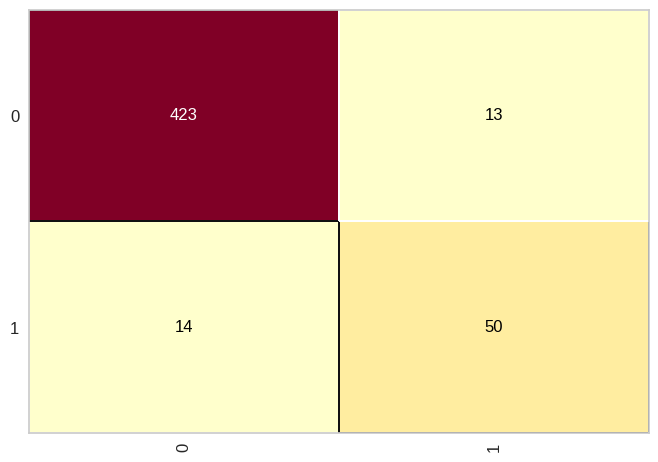

In [17]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_credit_teste, previsoes_credit))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



# Base census - 84.9%

In [19]:
with open('../data-pickles/census.pkl', 'rb') as file:
    X_census_treinamento, y_census_treinamento, X_census_testes, y_census_teste = pickle.load(file)
    
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 116), (27676,))

In [20]:
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

LogisticRegression(random_state=1)

In [21]:
previsoes_census = logistic_census.predict(X_census_testes)
previsoes_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [22]:
accuracy_score(y_census_teste, previsoes_census)

0.849539406345957

0.849539406345957

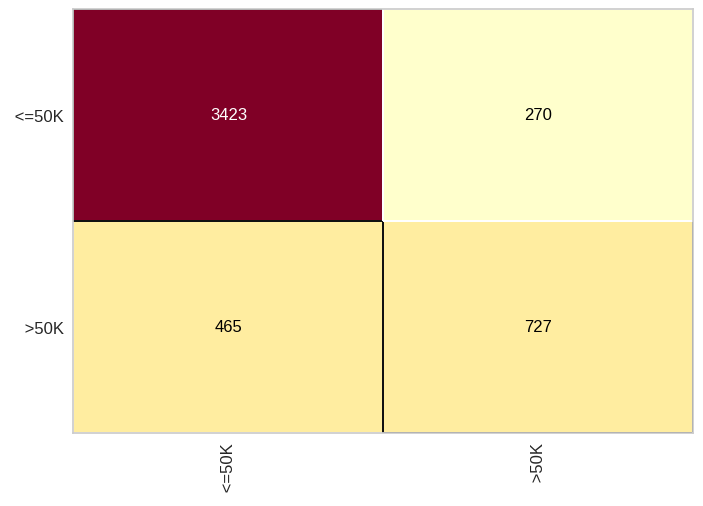

In [23]:
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_testes, y_census_teste)

In [24]:
print(classification_report(y_census_teste, previsoes_census))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.61      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.80      0.77      0.78      4885
weighted avg       0.84      0.85      0.84      4885

